In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pak=pd.read_csv("Pakistan Stock Exchange Stock Price History (1).csv")
df_recent=pd.read_csv('stock_pak.csv')

In [3]:
df_pak.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/28/2025,25.66,26.90,26.95,25.66,618.83K,-2.47%
1,04/25/2025,26.31,26.05,27.24,25.75,911.68K,-0.30%
2,04/24/2025,26.39,26.98,27.44,26.05,1.28M,-4.83%
3,04/23/2025,27.73,27.99,28.30,27.60,1.21M,-0.54%
4,04/22/2025,27.88,28.49,28.50,27.80,1.21M,-1.59%


In [4]:
df_recent.head()

,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [5]:
df_recent.tail()

,Date,Open,High,Low,Close,Change,Volume
3216,28-Feb-08,"10,688.98","10,724.21","10,655.23","10,704.15",39.79,"325,539,584"
3217,27-Feb-08,"10,670.68","10,732.92","10,623.36","10,664.36",-3.99,"396,419,776"
3218,26-Feb-08,"10,596.40","10,668.35","10,578.01","10,668.35",79.51,"265,668,784"
3219,25-Feb-08,"10,625.66","10,709.06","10,579.49","10,588.84",-18.45,"273,149,184"
3220,22-Feb-08,"10,634.22","10,635.42","10,546.38","10,607.29",0,"313,082,688"


In [6]:
# Step 1b: Parse 'Date' column
# Correct date formats based on actual data
df_pak['Date'] = pd.to_datetime(df_pak['Date'], format='%m/%d/%Y', errors='coerce')
df_recent['Date'] = pd.to_datetime(df_recent['Date'], format='%d-%b-%y', errors='coerce')



In [7]:
df_pak.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-04-28,25.66,26.90,26.95,25.66,618.83K,-2.47%
1,2025-04-25,26.31,26.05,27.24,25.75,911.68K,-0.30%
2,2025-04-24,26.39,26.98,27.44,26.05,1.28M,-4.83%
3,2025-04-23,27.73,27.99,28.30,27.60,1.21M,-0.54%
4,2025-04-22,27.88,28.49,28.50,27.80,1.21M,-1.59%


In [8]:
df_recent.head()

,Date,Open,High,Low,Close,Change,Volume
0,2021-02-23,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [9]:
df_recent.tail()

,Date,Open,High,Low,Close,Change,Volume
3216,2008-02-28,"10,688.98","10,724.21","10,655.23","10,704.15",39.79,"325,539,584"
3217,2008-02-27,"10,670.68","10,732.92","10,623.36","10,664.36",-3.99,"396,419,776"
3218,2008-02-26,"10,596.40","10,668.35","10,578.01","10,668.35",79.51,"265,668,784"
3219,2008-02-25,"10,625.66","10,709.06","10,579.49","10,588.84",-18.45,"273,149,184"
3220,2008-02-22,"10,634.22","10,635.42","10,546.38","10,607.29",0,"313,082,688"


In [10]:
df_pak = df_pak.rename(columns={
    'Price': 'Close',
    'Vol.': 'Volume',
    'Change %': 'Change'
})

In [11]:
df_pak.head()



,Date,Close,Open,High,Low,Volume,Change
0,2025-04-28,25.66,26.90,26.95,25.66,618.83K,-2.47%
1,2025-04-25,26.31,26.05,27.24,25.75,911.68K,-0.30%
2,2025-04-24,26.39,26.98,27.44,26.05,1.28M,-4.83%
3,2025-04-23,27.73,27.99,28.30,27.60,1.21M,-0.54%
4,2025-04-22,27.88,28.49,28.50,27.80,1.21M,-1.59%


In [12]:
df_recent.head()

,Date,Open,High,Low,Close,Change,Volume
0,2021-02-23,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,2021-02-22,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,2021-02-19,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,2021-02-18,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,2021-02-17,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


In [13]:
df_full = pd.concat([df_pak, df_recent], ignore_index=True)

In [14]:
def clean_numeric(series):
    return pd.to_numeric(
        series.astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('%', '', regex=False)
        .str.replace('K', 'e3', regex=False)
        .str.replace('M', 'e6', regex=False),
        errors='coerce'
    )

# Apply to all numeric columns (adjusted to match your dataframe)
for col in ['Open', 'High', 'Low', 'Close', 'Change', 'Volume']:
    if col in df_full.columns:
        df_full[col] = clean_numeric(df_full[col])

In [15]:
print(" Date Range:", df_full['Date'].min(), "to", df_full['Date'].max())
print(df_full[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change']].head())

 Date Range: 2008-02-22 00:00:00 to 2025-04-28 00:00:00
        Date   Open   High    Low  Close     Volume  Change
0 2025-04-28  26.90  26.95  25.66  25.66   618830.0   -2.47
1 2025-04-25  26.05  27.24  25.75  26.31   911680.0   -0.30
2 2025-04-24  26.98  27.44  26.05  26.39  1280000.0   -4.83
3 2025-04-23  27.99  28.30  27.60  27.73  1210000.0   -0.54
4 2025-04-22  28.49  28.50  27.80  27.88  1210000.0   -1.59


In [16]:
df_full.head()

,Date,Close,Open,High,Low,Volume,Change
0,2025-04-28,25.66,26.90,26.95,25.66,618830.0,-2.47
1,2025-04-25,26.31,26.05,27.24,25.75,911680.0,-0.30
2,2025-04-24,26.39,26.98,27.44,26.05,1280000.0,-4.83
3,2025-04-23,27.73,27.99,28.30,27.60,1210000.0,-0.54
4,2025-04-22,27.88,28.49,28.50,27.80,1210000.0,-1.59


In [17]:
df_full.tail()

,Date,Close,Open,High,Low,Volume,Change
4282,2008-02-28,10704.15,10688.98,10724.21,10655.23,325539584.0,39.79
4283,2008-02-27,10664.36,10670.68,10732.92,10623.36,396419776.0,-3.99
4284,2008-02-26,10668.35,10596.40,10668.35,10578.01,265668784.0,79.51
4285,2008-02-25,10588.84,10625.66,10709.06,10579.49,273149184.0,-18.45
4286,2008-02-22,10607.29,10634.22,10635.42,10546.38,313082688.0,0.00


# Training Model

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler ONCE on the entire 'Close' column
scaler = MinMaxScaler()
scaler.fit(df_full['Close'].values.reshape(-1, 1))
scaled_data = scaler.transform(df_full['Close'].values.reshape(-1, 1))
# ✅ DO NOT re-fit this again later!


In [20]:
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM expects 3D input


In [21]:
# Step 8: Split into train and test sets
#split = int(len(X) * 0.8)
#X_train, X_test = X[:split], X[split:]
#y_train, y_test = y[:split], y[split:]


# Model Building

In [23]:
# Step 9: Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Step 10: Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X, y, epochs=20, batch_size=32, validation_data=(X, y))


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0296 - val_loss: 0.0013
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0034 - val_loss: 0.0013
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0027 - val_loss: 9.6806e-04
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0029 - val_loss: 8.6397e-04
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0025 - val_loss: 8.5363e-04
Epoch 9/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0021 - val_loss: 6.8500e-04
Epoch 10/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0017 - val_loss: 6.8594e-04
Epoch 11/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0018 - val_loss: 5.9562e-04
Epoch 12/20
133/

In [113]:
save_model_for_deployment(model, scaler)


✅ Model, scaler, and metadata saved in: deployment_package


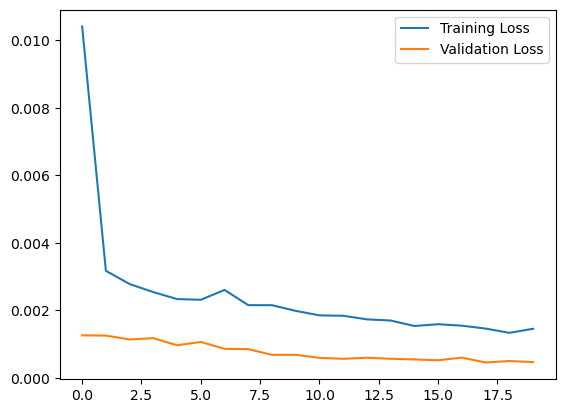

In [24]:
# Step 11: Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [25]:
# Step 12: Predict and inverse transform
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_true = scaler.inverse_transform(y.reshape(-1, 1))




133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [26]:
# Align test dates
test_dates = df_full['Date'].iloc[-len(predicted_stock_price):]

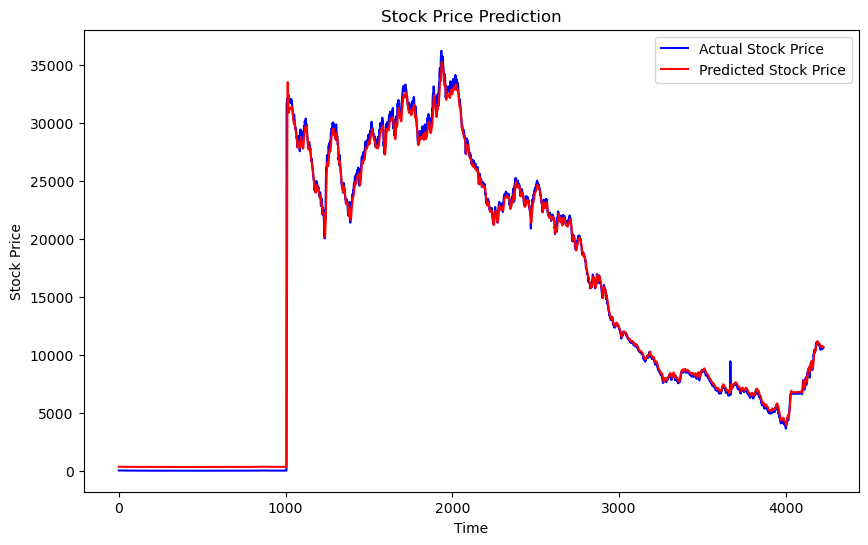

In [27]:
# Step 13: Plot predictions vs true values
plt.figure(figsize=(10,6))
plt.plot(y_test_true, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
# Print RMSE
rmse = np.sqrt(mean_squared_error(y_test_true, predicted_stock_price))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 785.6932085941238


In [29]:
# Create a DataFrame for easy handling
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_true.flatten(),
    'Predicted': predicted_stock_price.flatten()
})

In [30]:
actual = results_df['Actual'].values
predicted = results_df['Predicted'].values

In [31]:
# Calculate metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

In [32]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 325.96
Mean Squared Error (MSE): 617313.82
Root Mean Squared Error (RMSE): 785.69
R² Score: 0.9954


In [33]:
print(df_full[df_full['Date'].between('2023-09-01', '2024-06-01')])

          Date  Close   Open   High    Low     Volume  Change
223 2024-05-31  13.05  13.02  13.33  13.00  1350000.0   -0.08
224 2024-05-30  13.06  13.40  13.49  13.00   963100.0   -1.43
225 2024-05-29  13.25  13.49  13.53  12.90  3120000.0   -0.23
226 2024-05-27  13.28  14.20  14.20  13.25  6360000.0   -5.08
227 2024-05-24  13.99  14.48  14.80  13.87  3550000.0   -2.71
..         ...    ...    ...    ...    ...        ...     ...
403 2023-09-07   8.01   8.15   8.15   8.01    13500.0   -0.99
404 2023-09-06   8.09   8.01   8.12   8.01     3000.0   -0.74
405 2023-09-05   8.15   7.88   8.15   7.88   432500.0    1.87
406 2023-09-04   8.00   7.82   8.03   7.82   370000.0    3.90
407 2023-09-01   7.70   7.80   7.85   7.70    32500.0   -1.16

[185 rows x 7 columns]


In [34]:
print("Date range:", results_df['Date'].min(), "to", results_df['Date'].max())
print("Length of Date:", len(results_df['Date']))
print("Length of Actual:", len(results_df['Actual']))
print("Length of Predicted:", len(results_df['Predicted']))


Date range: 2008-02-22 00:00:00 to 2025-01-27 00:00:00
Length of Date: 4227
Length of Actual: 4227
Length of Predicted: 4227


In [35]:
# Define election dates
election_dates = pd.to_datetime(['2008-02-18', '2013-05-11', '2018-07-25', '2024-02-08'])

In [36]:
 #Ensure date column is datetime and data is sorted
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full = df_full.sort_values('Date')

In [37]:
# Your model's prediction and inverse transform
#predicted_stock_price = model.predict(X)
#predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

In [38]:
# Align test dates
test_dates = df_full['Date'].iloc[-len(predicted_stock_price):]

133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


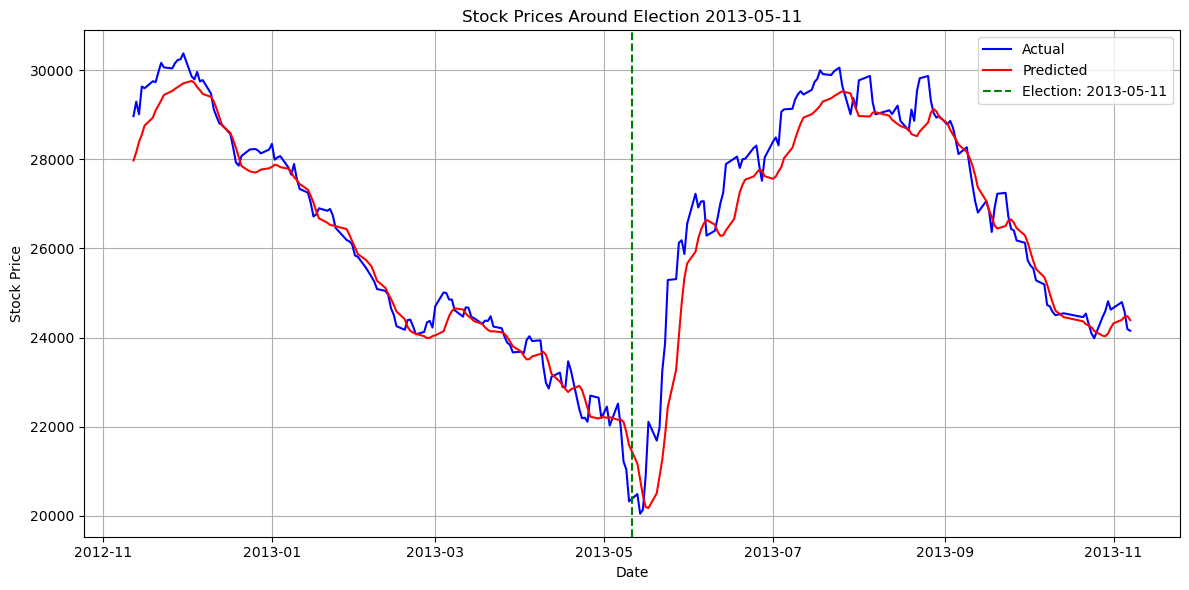

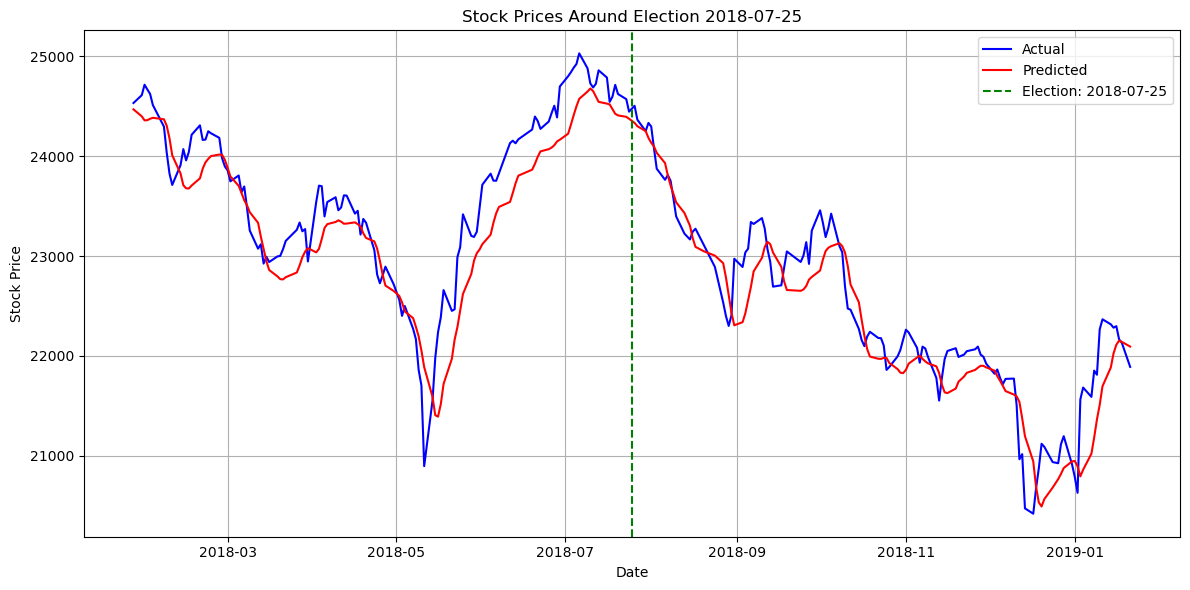

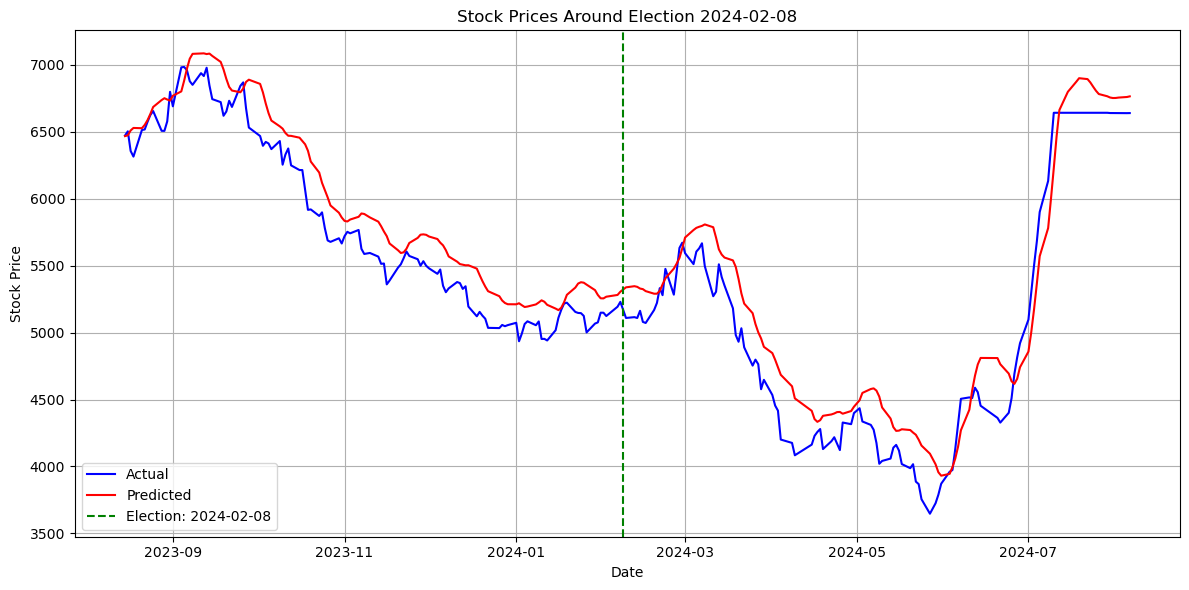

In [39]:

# Your model's prediction and inverse transform
predicted_stock_price = model.predict(X)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))

# Actual corresponding test values (also inverse transformed)
y_test_true = scaler.inverse_transform(y.reshape(-1, 1))

# Align test dates
test_dates = df_full['Date'].iloc[-len(predicted_stock_price):]

# Create a DataFrame for easy handling
results_df = pd.DataFrame({
    'Date': test_dates,
    'Actual': y_test_true.flatten(),
    'Predicted': predicted_stock_price.flatten()
})
# Define election dates
election_dates = pd.to_datetime([ '2013-05-11', '2018-07-25', '2024-02-08'])

# Plot actual vs predicted around each election
window = 180  # days before and after
for election_date in election_dates:
    mask = (results_df['Date'] >= election_date - pd.Timedelta(days=window)) & \
           (results_df['Date'] <= election_date + pd.Timedelta(days=window))
    election_window_df = results_df.loc[mask]

    if election_window_df.empty:
        continue  # Skip if election is not in test window

    plt.figure(figsize=(12, 6))
    plt.plot(election_window_df['Date'], election_window_df['Actual'], label='Actual', color='blue')
    plt.plot(election_window_df['Date'], election_window_df['Predicted'], label='Predicted', color='red')
    plt.axvline(x=election_date, color='green', linestyle='--', label=f'Election: {election_date.date()}')
    plt.title(f'Stock Prices Around Election {election_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [40]:
# Save the entire model to an HDF5 file
model.save("stock_price_lstm_model.h5")
print("Model saved successfully.")


Model saved successfully.


# 2028 Election Predection

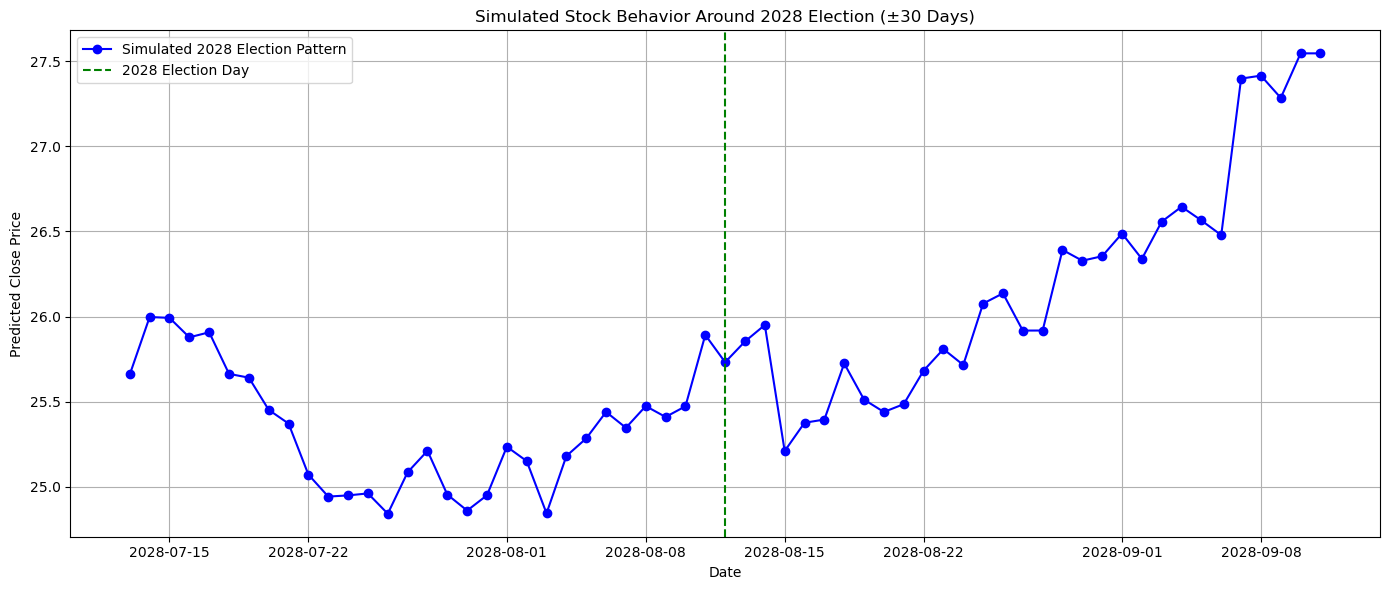

In [42]:


# Election Dates
election_dates = ['2013-05-11', '2018-07-25', '2024-02-08']
window_days = 30  # 30 before and after = 61 total days
pattern_matrix = []

for date in election_dates:
    center = pd.to_datetime(date)
    start = center - pd.Timedelta(days=window_days)
    end = center + pd.Timedelta(days=window_days)

    # Try to extract and interpolate the window
    try:
        window = df_full[(df_full['Date'] >= start) & (df_full['Date'] <= end)].copy()
        window = window.set_index('Date').reindex(pd.date_range(start, end), method='nearest')
        close_vals = window['Close'].interpolate().bfill().ffill().values
        if len(close_vals) == 2 * window_days + 1:
            pattern_matrix.append(close_vals)
    except Exception as e:
        print(f"⚠️ Skipped date {date}: {e}")

# Check and proceed
if not pattern_matrix:
    print("❌ Still no valid patterns after relaxed handling.")
else:
    normalized_patterns = [pattern / pattern[0] * 100 for pattern in pattern_matrix]
    average_pattern = np.mean(normalized_patterns, axis=0)

    # Predict 2028
    baseline_price = df_full['Close'].iloc[-1]
    predicted_2028_prices = baseline_price * average_pattern / 100

    election_2028 = pd.to_datetime('2028-08-12')
    dates_2028 = pd.date_range(start=election_2028 - pd.Timedelta(days=window_days), periods=2*window_days + 1)

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(dates_2028, predicted_2028_prices, color='blue', marker='o', label='Simulated 2028 Election Pattern')
    plt.axvline(election_2028, color='green', linestyle='--', label='2028 Election Day')
    plt.title('Simulated Stock Behavior Around 2028 Election (±30 Days)')
    plt.xlabel('Date')
    plt.ylabel('Predicted Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Effect of  Federal Budget Announcement On Stock Market

In [44]:
# Budget Announcement Dates
budget_dates = pd.to_datetime([
    '2009-06-13', '2010-06-05', '2011-06-03', '2012-06-01',
    '2013-06-12', '2014-06-03', '2015-06-05', '2016-06-03',
    '2017-05-26', '2018-04-27', '2019-06-11', '2020-06-12',
    '2021-06-11', '2022-06-10', '2023-06-09', '2024-06-07'
])


Processing Budget Date: 2009-06-13
Window Start: 2009-04-14, End: 2009-08-12, Records Found: 86


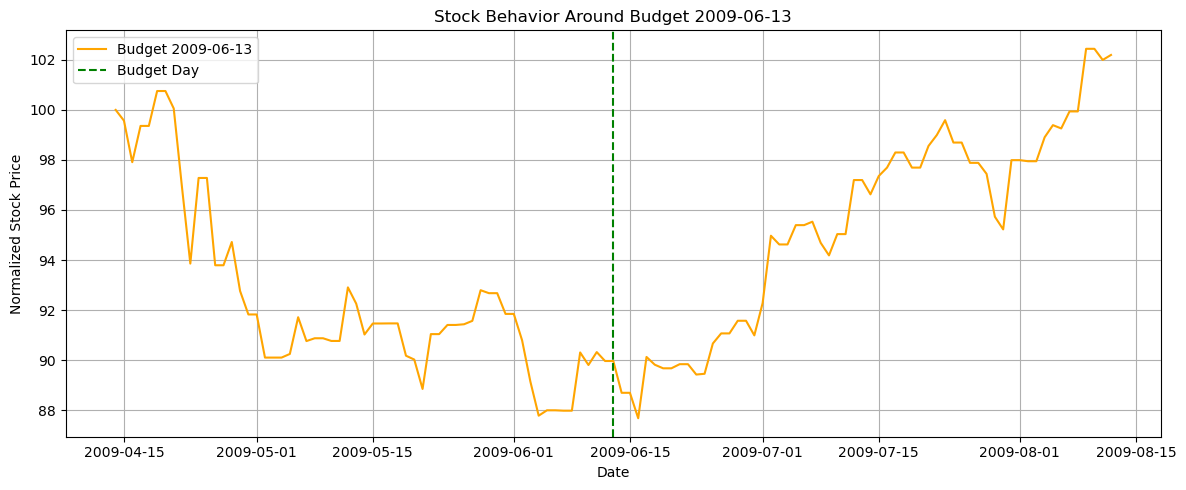


Processing Budget Date: 2010-06-05
Window Start: 2010-04-06, End: 2010-08-04, Records Found: 87


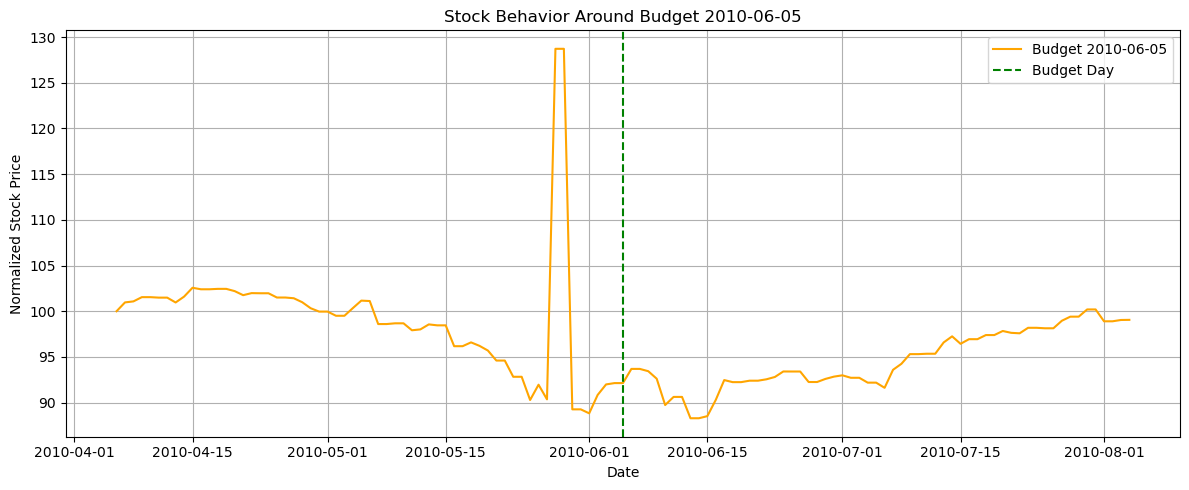


Processing Budget Date: 2011-06-03
Window Start: 2011-04-04, End: 2011-08-02, Records Found: 87


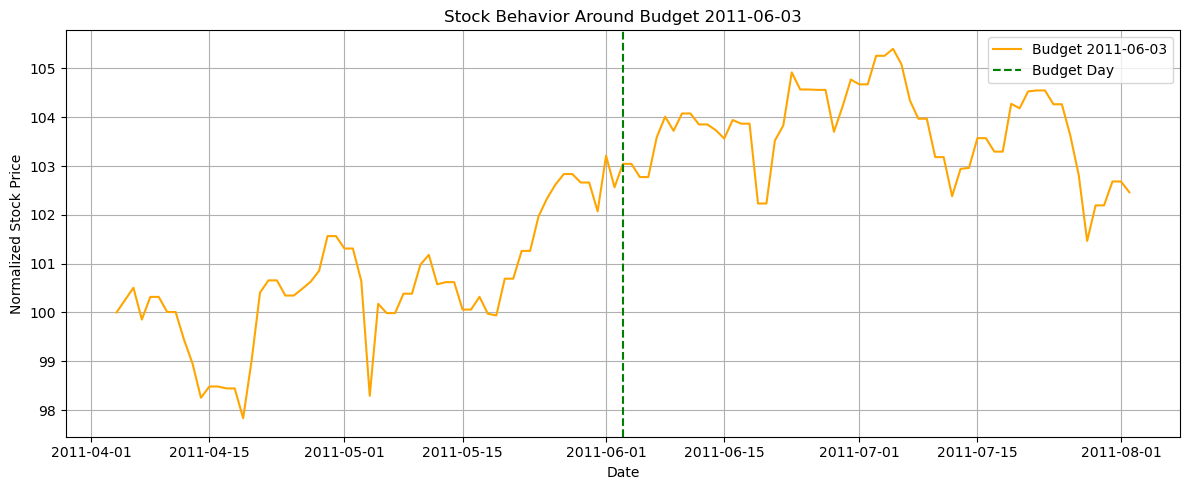


Processing Budget Date: 2012-06-01
Window Start: 2012-04-02, End: 2012-07-31, Records Found: 86


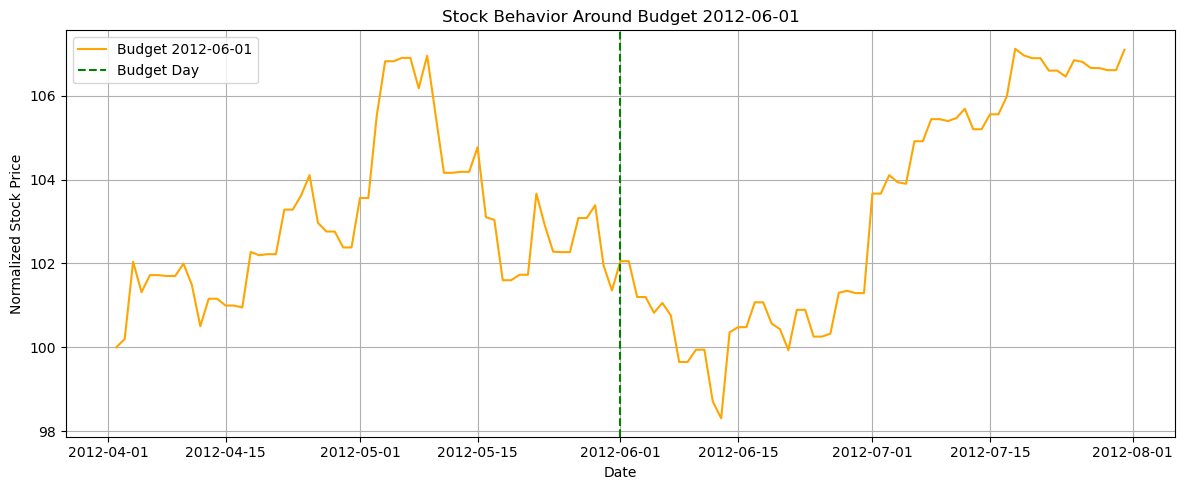


Processing Budget Date: 2013-06-12
Window Start: 2013-04-13, End: 2013-08-11, Records Found: 81


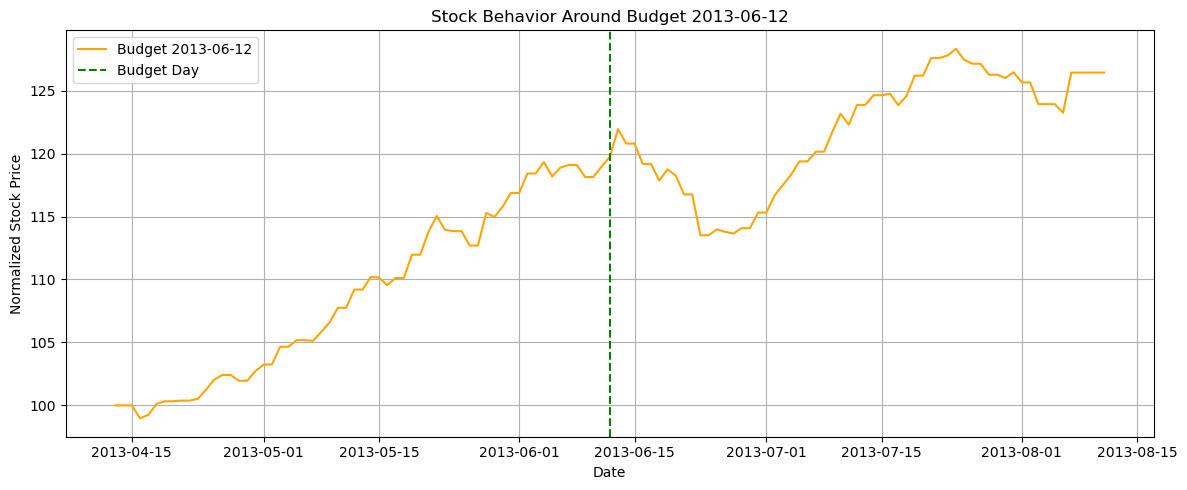


Processing Budget Date: 2014-06-03
Window Start: 2014-04-04, End: 2014-08-02, Records Found: 80


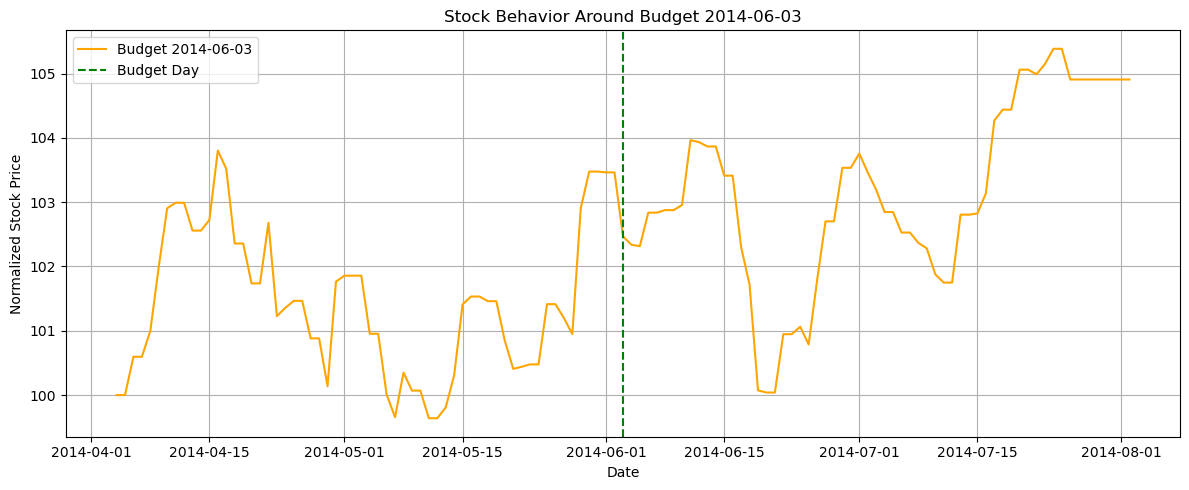


Processing Budget Date: 2015-06-05
Window Start: 2015-04-06, End: 2015-08-04, Records Found: 83


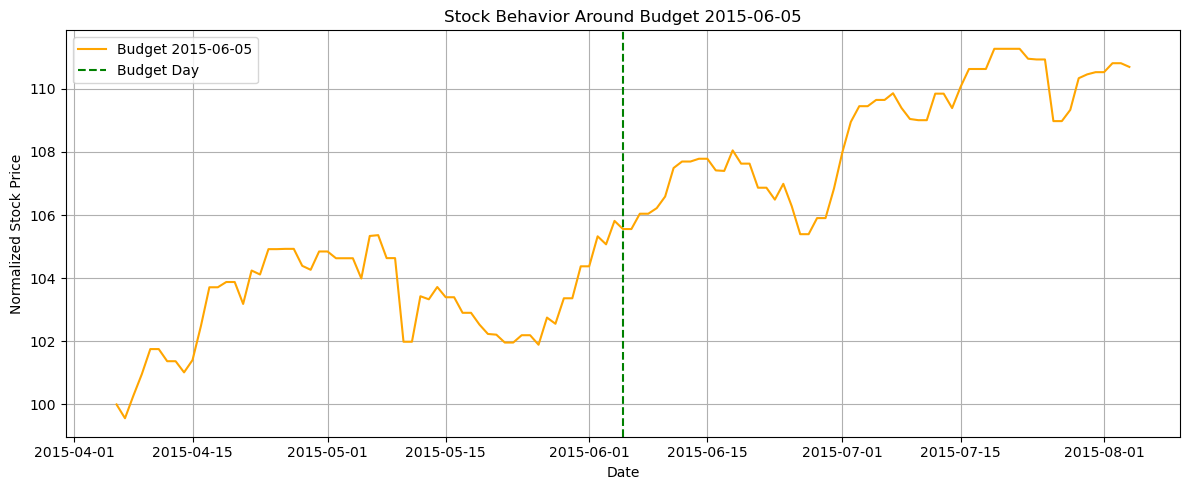


Processing Budget Date: 2016-06-03
Window Start: 2016-04-04, End: 2016-08-02, Records Found: 81


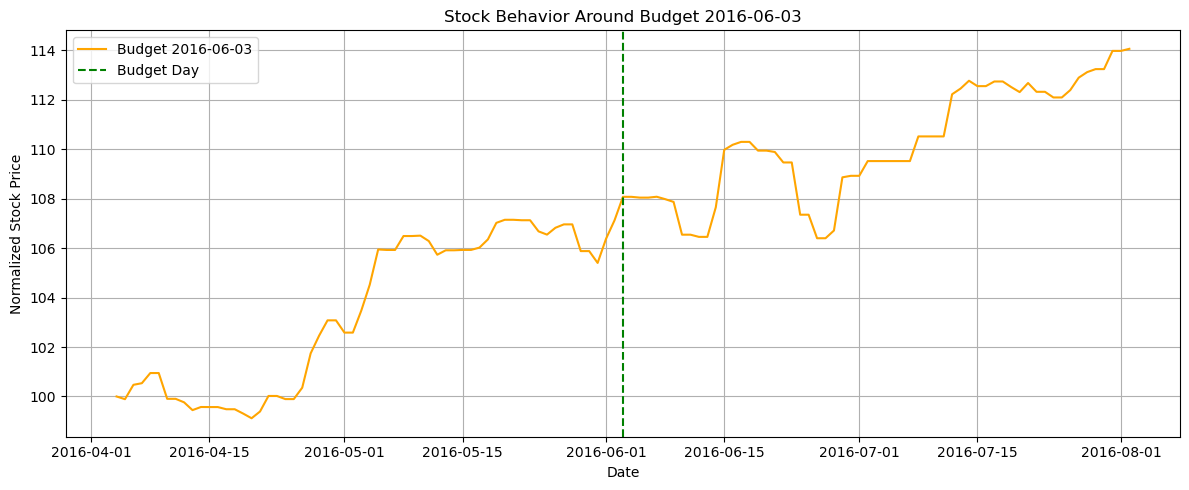


Processing Budget Date: 2017-05-26
Window Start: 2017-03-27, End: 2017-07-25, Records Found: 82


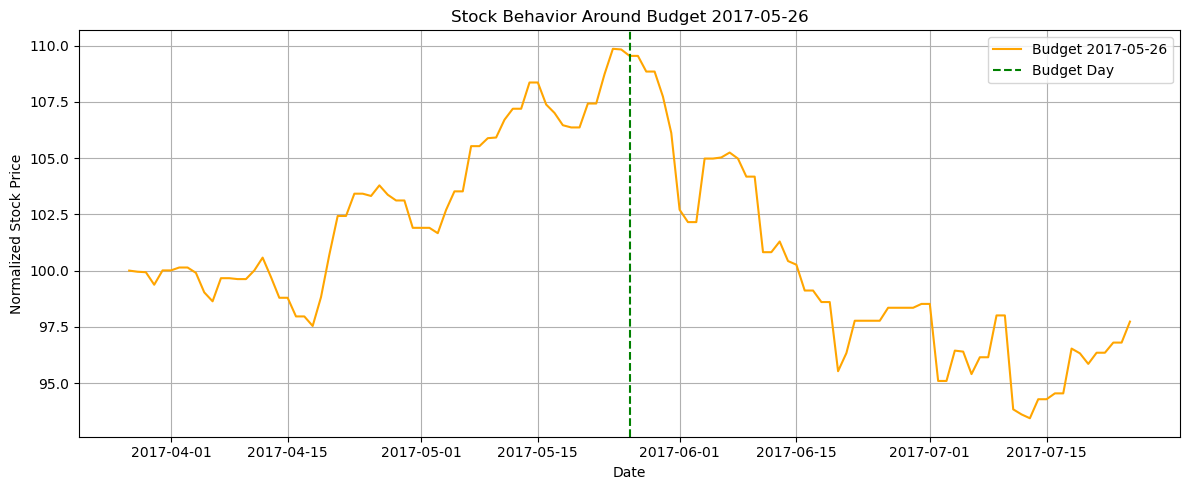


Processing Budget Date: 2018-04-27
Window Start: 2018-02-26, End: 2018-06-26, Records Found: 82


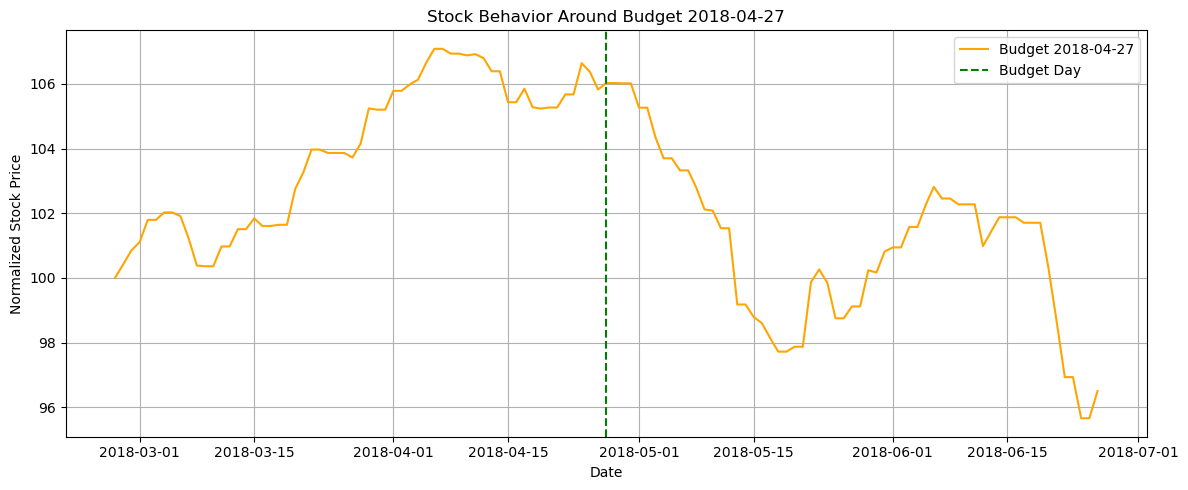


Processing Budget Date: 2019-06-11
Window Start: 2019-04-12, End: 2019-08-10, Records Found: 80


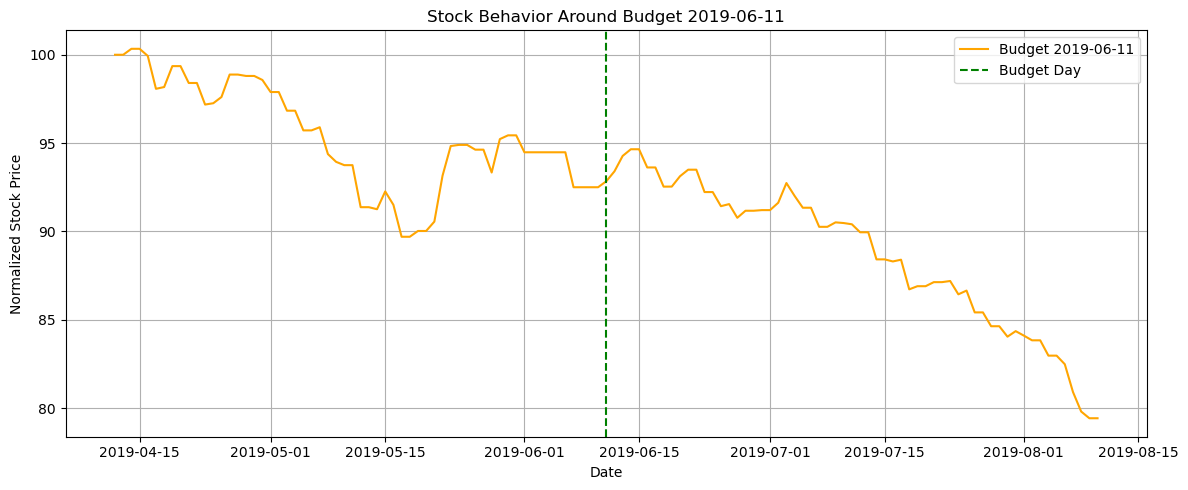


Processing Budget Date: 2020-06-12
Window Start: 2020-04-13, End: 2020-08-11, Records Found: 81


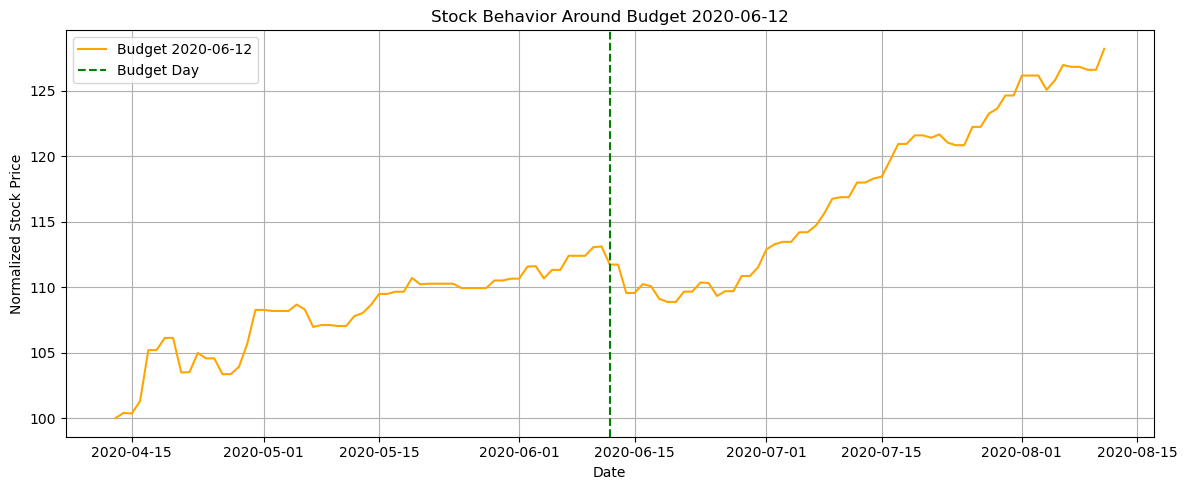


Processing Budget Date: 2021-06-11
Window Start: 2021-04-12, End: 2021-08-10, Records Found: 78


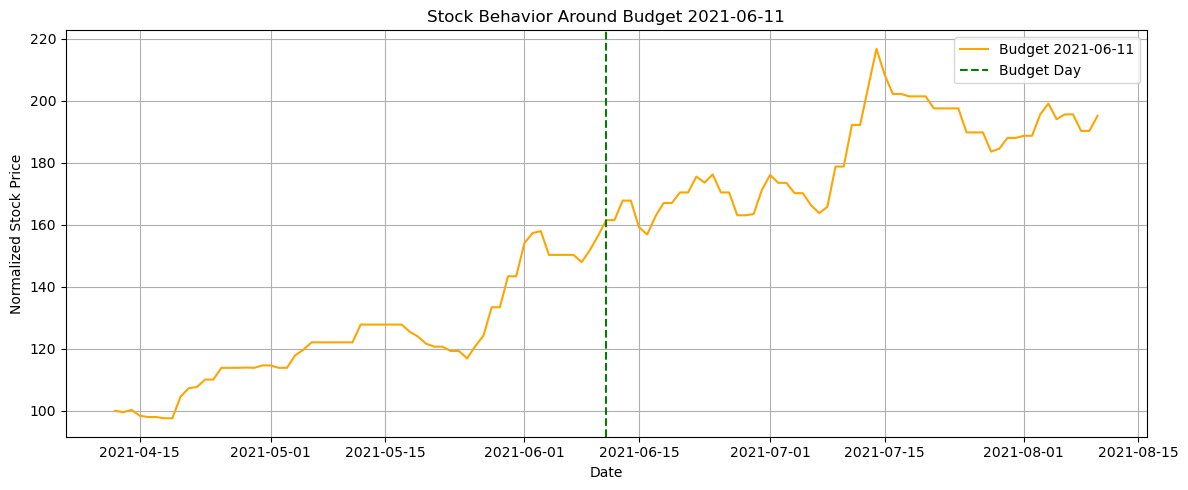


Processing Budget Date: 2022-06-10
Window Start: 2022-04-11, End: 2022-08-09, Records Found: 77


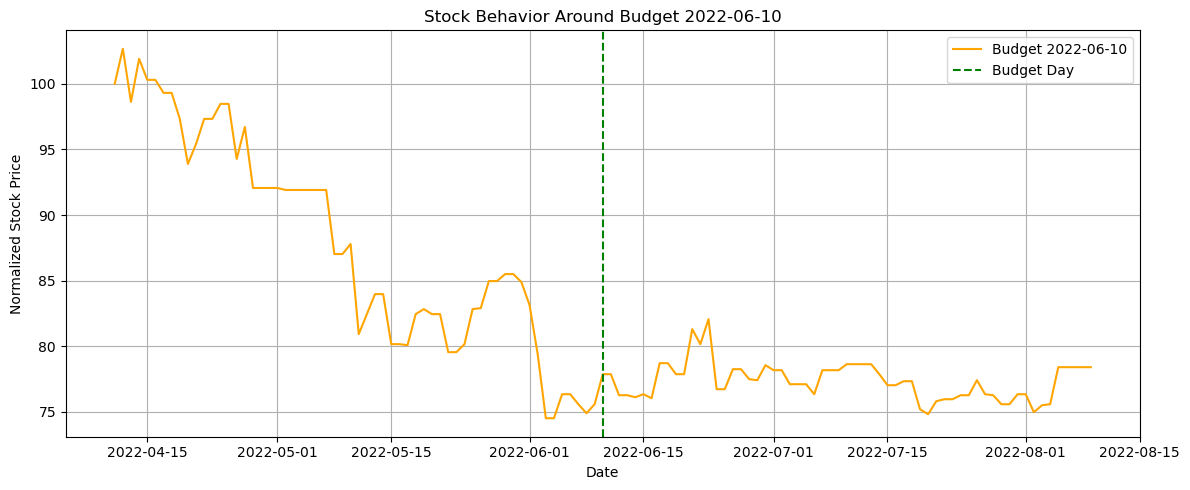


Processing Budget Date: 2023-06-09
Window Start: 2023-04-10, End: 2023-08-08, Records Found: 78


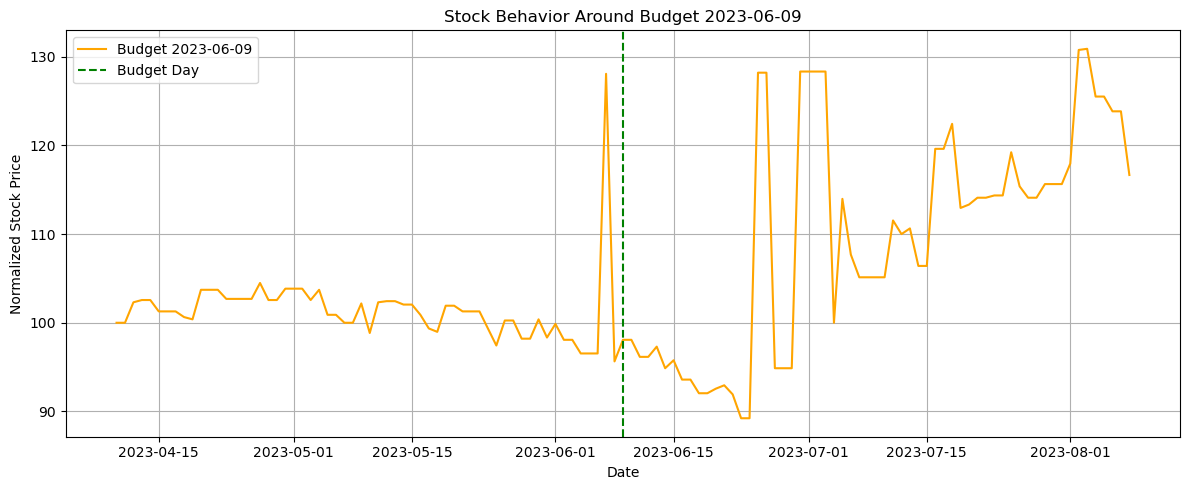


Processing Budget Date: 2024-06-07
Window Start: 2024-04-08, End: 2024-08-06, Records Found: 77


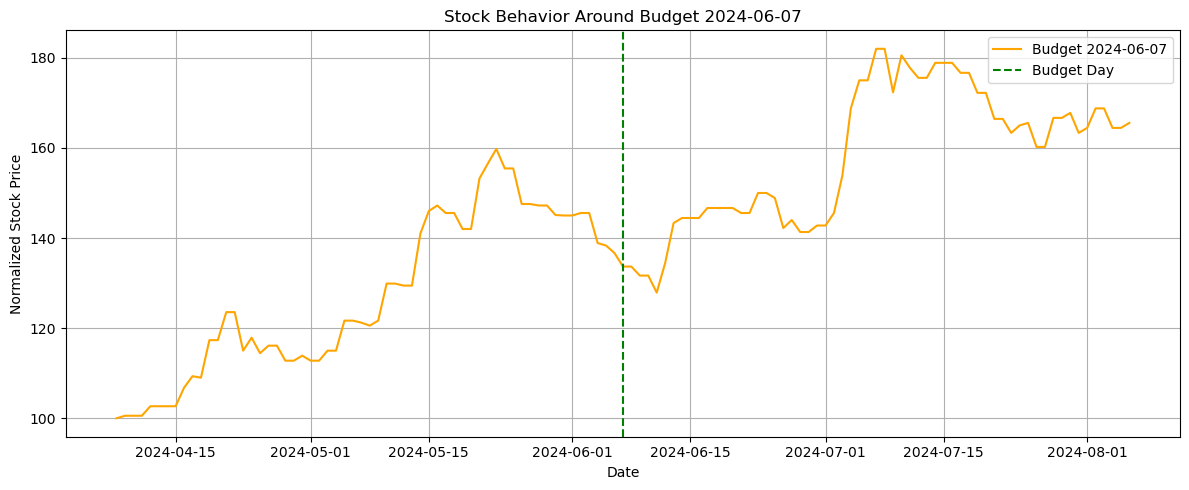

In [45]:
window_days = 60  # Days before and after
for date in budget_dates:
    start = date - pd.Timedelta(days=window_days)
    end = date + pd.Timedelta(days=window_days)

    window = df_full[(df_full['Date'] >= start) & (df_full['Date'] <= end)].copy()

    print(f"\nProcessing Budget Date: {date.date()}")
    print(f"Window Start: {start.date()}, End: {end.date()}, Records Found: {len(window)}")

    if len(window) >= 39:
        window = window.set_index('Date').reindex(pd.date_range(start, end), method='nearest')
        close_vals = window['Close'].interpolate().bfill().ffill().values

        if len(close_vals) == 2 * window_days + 1:
            normalized = close_vals / close_vals[0] * 100
            dates = pd.date_range(start=start, periods=2*window_days+1)

            plt.figure(figsize=(12, 5))
            plt.plot(dates, normalized, label=f'Budget {date.date()}', color='orange')
            plt.axvline(x=date, color='green', linestyle='--', label='Budget Day')
            plt.title(f'Stock Behavior Around Budget {date.date()}')
            plt.xlabel('Date')
            plt.ylabel('Normalized Stock Price')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"⚠️ Skipped {date.date()}: Not enough points after reindexing")
    else:
        print(f"❌ Skipped {date.date()}: Not enough raw data in window")


# 2025 buject predection

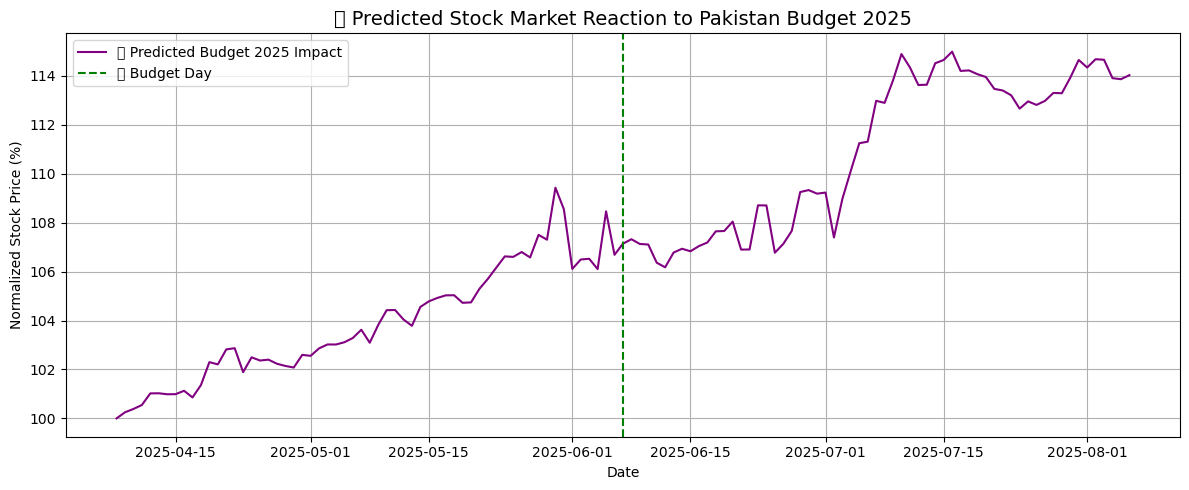

In [47]:

import warnings
warnings.filterwarnings('ignore')
# 1. Set 2025 Budget Date
budget_2025_date = pd.to_datetime('2025-06-07')
window_days = 60

# 2. Define historical budget dates
past_budgets = pd.to_datetime([
    '2009-06-13', '2010-06-05', '2011-06-03', '2012-06-01',
    '2013-06-12', '2014-06-03', '2015-06-05', '2016-06-03',
    '2017-05-26', '2018-04-27', '2019-06-11', '2020-06-12',
    '2021-06-11', '2022-06-10', '2023-06-09', '2024-06-07'
])

# 3. Collect normalized patterns from each past budget event
patterns = []
for date in past_budgets:
    start = date - pd.Timedelta(days=window_days)
    end = date + pd.Timedelta(days=window_days)
    window = df_full[(df_full['Date'] >= start) & (df_full['Date'] <= end)].copy()

    if len(window) >= 39:
        window = window.set_index('Date').reindex(pd.date_range(start, end), method='nearest')
        close_vals = window['Close'].interpolate().bfill().ffill().values

        if len(close_vals) == 2 * window_days + 1:
            normalized = close_vals / close_vals[0] * 100
            patterns.append(normalized)

# 4. Average pattern calculation
if patterns:
    avg_pattern = np.mean(patterns, axis=0)
    dates = pd.date_range(budget_2025_date - pd.Timedelta(days=window_days),
                          budget_2025_date + pd.Timedelta(days=window_days))

    # 5. Plotting predicted budget 2025 impact
    plt.figure(figsize=(12, 5))
    plt.plot(dates, avg_pattern, color='purple', label='📊 Predicted Budget 2025 Impact')
    plt.axvline(x=budget_2025_date, color='green', linestyle='--', label='🗓 Budget Day')
    plt.title("📈 Predicted Stock Market Reaction to Pakistan Budget 2025", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Normalized Stock Price (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough clean past data to generate prediction.")


# Effects Of GeoPolitical Events Stock Market

In [49]:

# Define events and comments
geopolitical_events = {
    '2016-09-29': "🔥 India conducted 'surgical strike' after Uri attack",
    '2019-02-27': "✈️ Pakistan shot down Indian jet after Balakot airstrike",
    '2021-11-01': "🪧 Crackdown on TLP protests by Pakistan govt",
    '2023-05-09': "🚨 Imran Khan arrested – massive unrest in Pakistan"
}

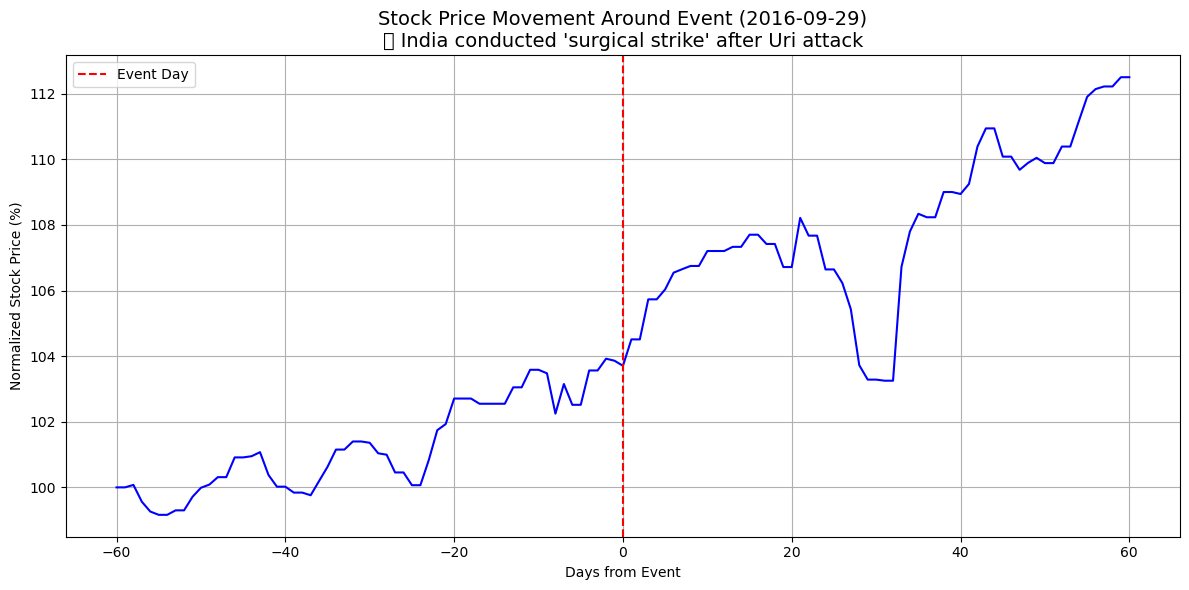

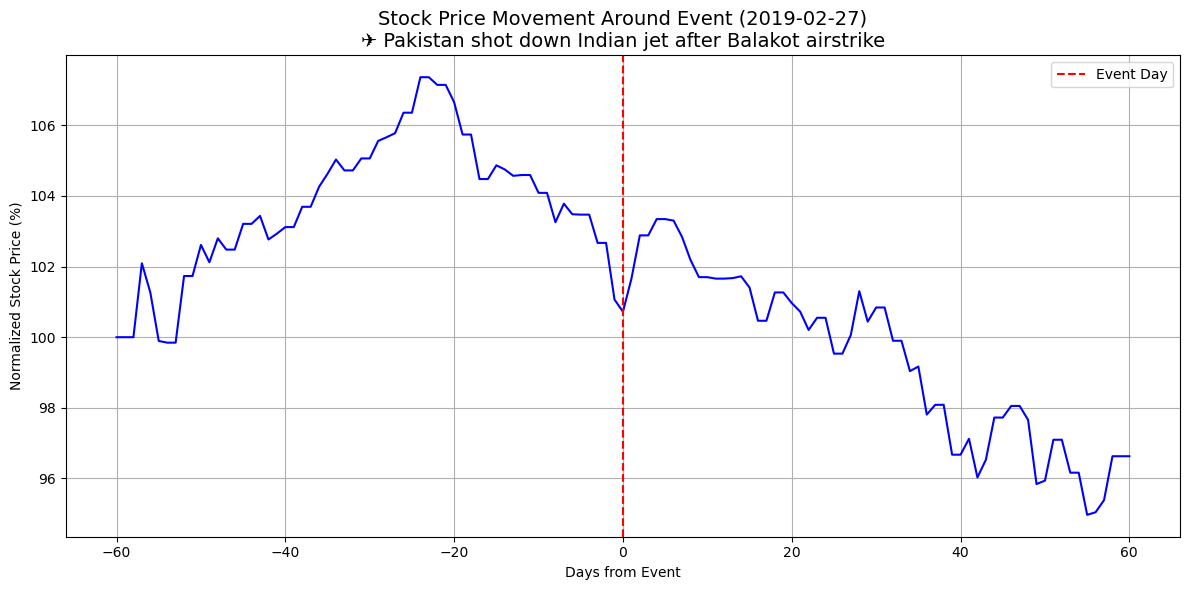

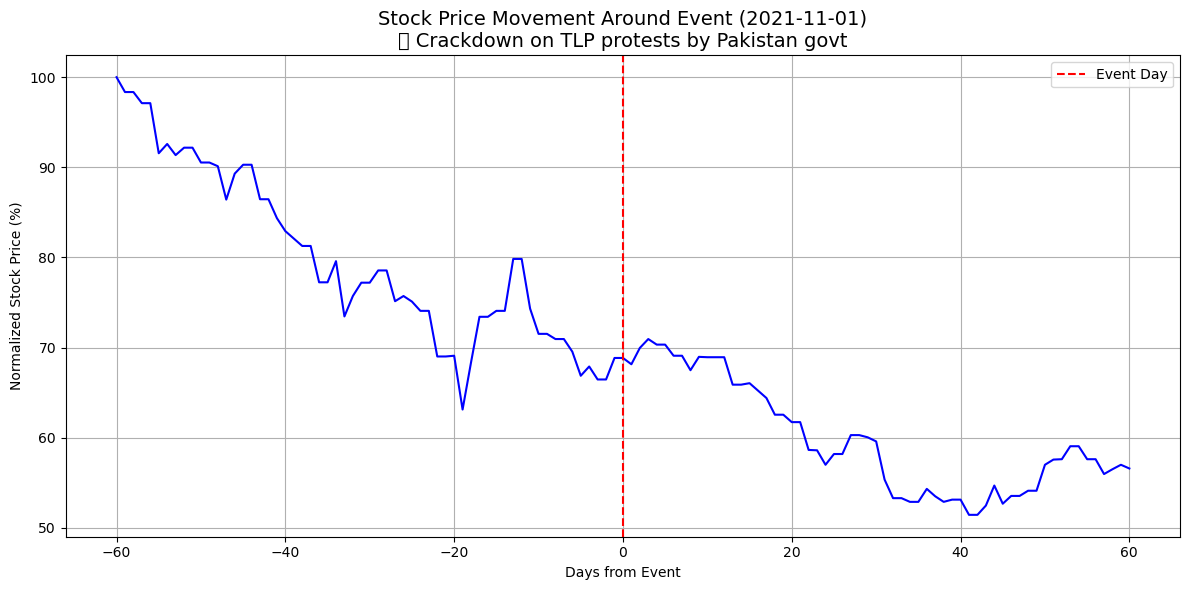

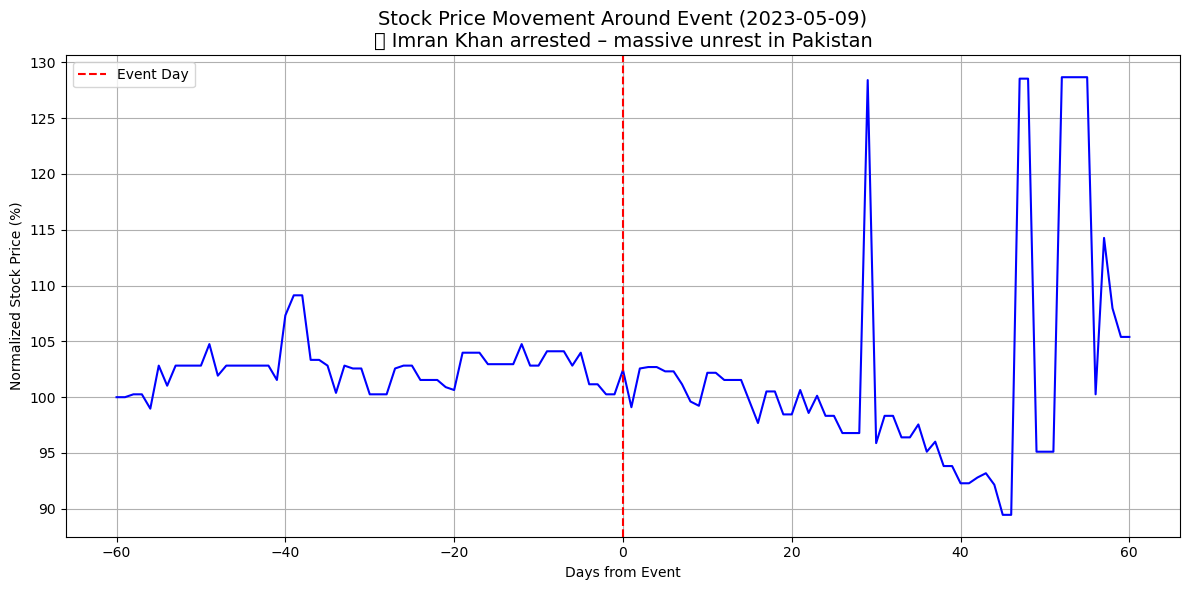

In [50]:
    

# Set window size
window_days = 60

# Convert keys to datetime
geopolitical_events = {pd.to_datetime(k): v for k, v in geopolitical_events.items()}

# Loop over each event
for date, comment in geopolitical_events.items():
    start = date - pd.Timedelta(days=window_days)
    end = date + pd.Timedelta(days=window_days)

    # Extract window and handle missing dates
    window = df_full[(df_full['Date'] >= start) & (df_full['Date'] <= end)].copy()

    # Continue if we have enough data
    if len(window) >= 40:
        window = window.set_index('Date').reindex(pd.date_range(start, end), method='nearest')
        window['Close'] = window['Close'].interpolate().bfill().ffill()
        
        if window['Close'].isnull().sum() == 0:
            close_vals = window['Close'].values
            normalized = close_vals / close_vals[0] * 100
            days = np.arange(-window_days, window_days + 1)

            # Plot
            plt.figure(figsize=(12, 6))
            plt.plot(days, normalized, color='blue')
            plt.axvline(x=0, color='red', linestyle='--', label='Event Day')
            plt.title(f"Stock Price Movement Around Event ({date.date()})\n{comment}", fontsize=14)
            plt.xlabel('Days from Event')
            plt.ylabel('Normalized Stock Price (%)')
            plt.grid(True)
            plt.tight_layout()
            plt.legend()
            plt.show()
        else:
            print(f"⚠️ Skipped {comment} — too many missing Close values after reindexing.")
    else:
        print(f"⚠️ Skipped {comment} — insufficient data points in ±{window_days} day window.")


# Impact of pak-India War On Stock Market

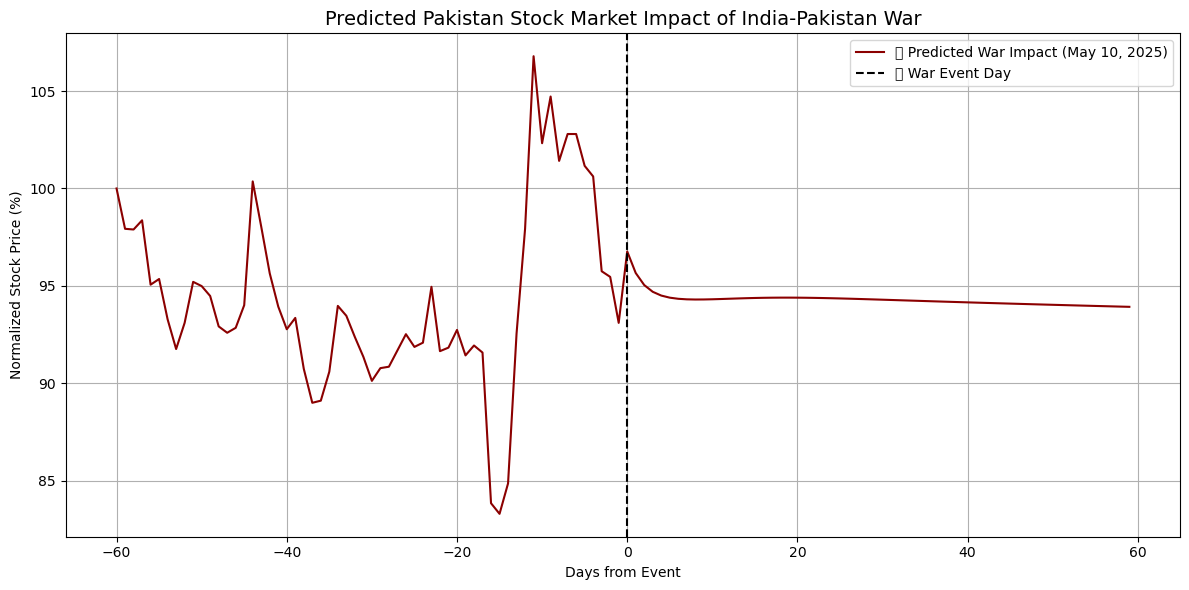

In [52]:


# 1. Set the simulated war event date
war_date = pd.to_datetime('2025-05-10')
window_days = 60

# 2. Create the LSTM input sequence: use last 60 days before May 10
pre_war_window = df_full[(df_full['Date'] < war_date)].copy()
pre_war_window = pre_war_window.tail(60)

# Check we have enough data
if len(pre_war_window) == 60:
    # 3. Scale and reshape
    scaler = MinMaxScaler()
    scaled_close = scaler.fit_transform(pre_war_window[['Close']])

    X_input = np.array(scaled_close).reshape(1, 60, 1)

    # 4. Predict next 60 days using the trained model
    predicted = []
    current_input = X_input.copy()

    for _ in range(60):
        pred = model.predict(current_input, verbose=0)
        predicted.append(pred[0, 0])
        current_input = np.append(current_input[:, 1:, :], [[[pred[0, 0]]]], axis=1)

    # 5. Inverse transform to original price scale
    predicted_prices = scaler.inverse_transform(np.array(predicted).reshape(-1, 1)).flatten()

    # 6. Normalize the full series (combine pre-war + predicted)
    combined = np.concatenate([pre_war_window['Close'].values, predicted_prices])
    normalized = combined / combined[0] * 100
    days = np.arange(-60, 60)

    # 7. Plot
    plt.figure(figsize=(12, 6))
    plt.plot(days, normalized, color='darkred', label="📉 Predicted War Impact (May 10, 2025)")
    plt.axvline(x=0, color='black', linestyle='--', label='🛑 War Event Day')
    plt.title("Predicted Pakistan Stock Market Impact of India-Pakistan War", fontsize=14)
    plt.xlabel("Days from Event")
    plt.ylabel("Normalized Stock Price (%)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("❌ Not enough pre-event data to simulate the prediction window.")


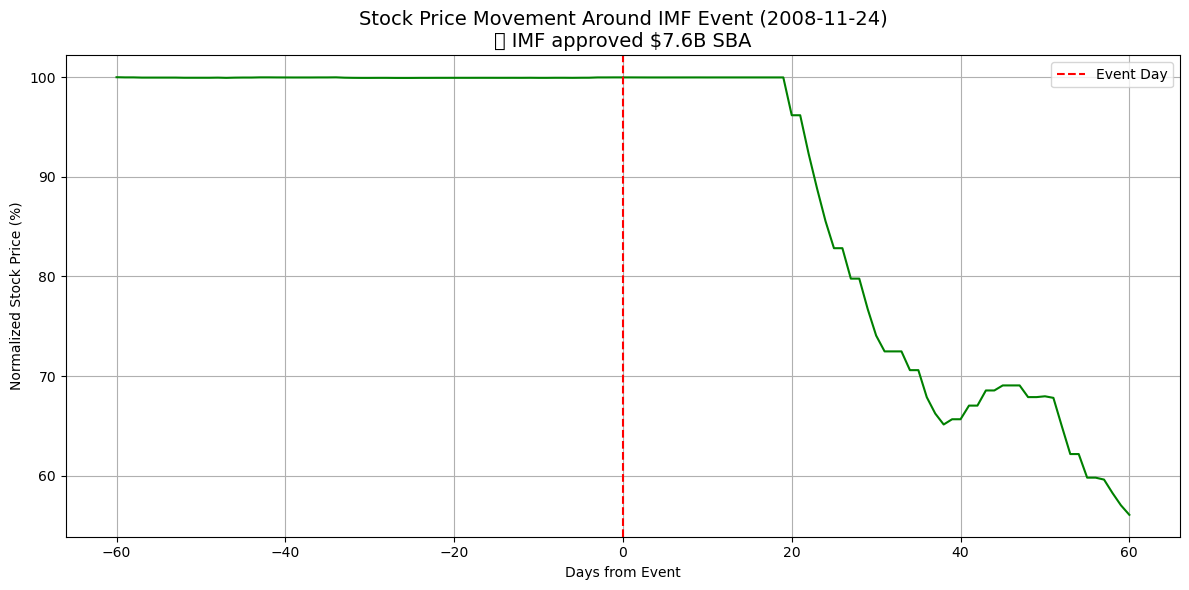

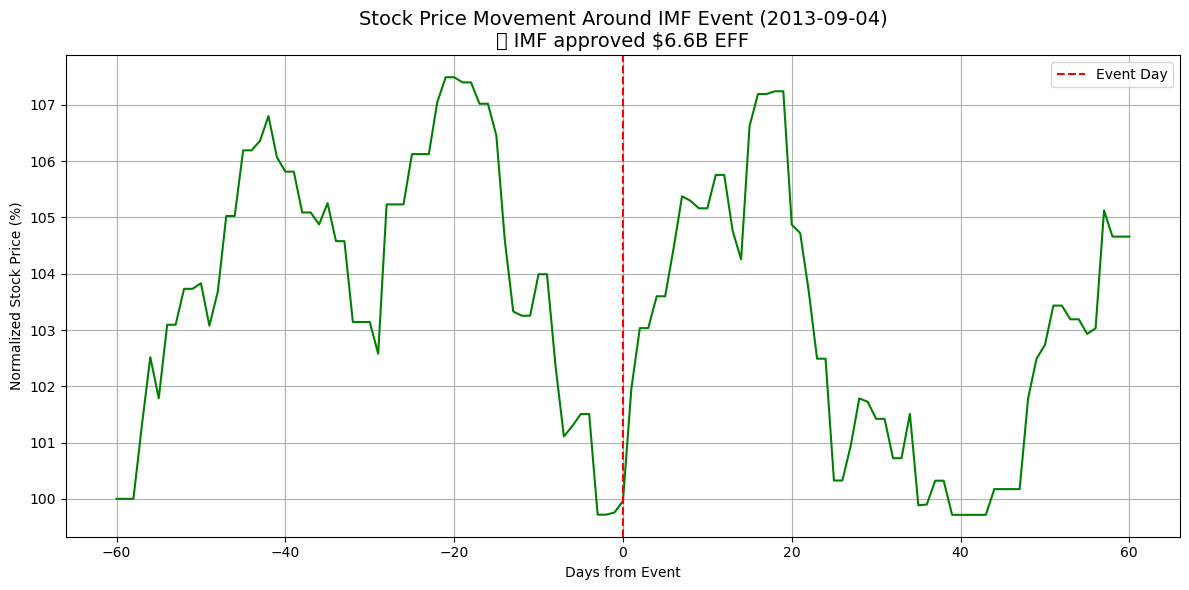

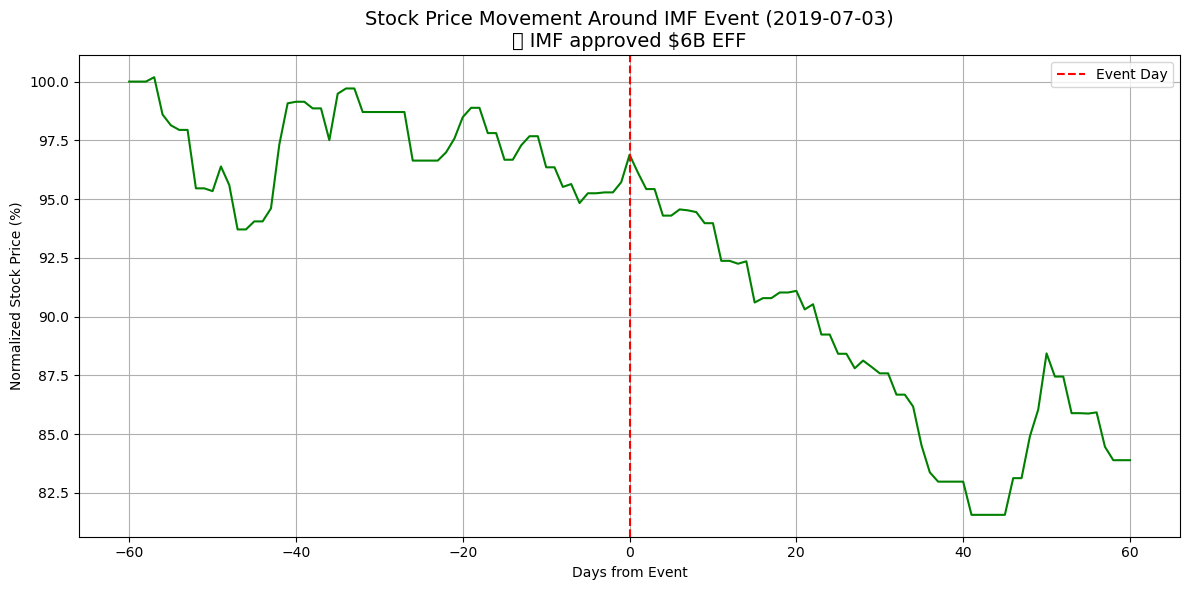

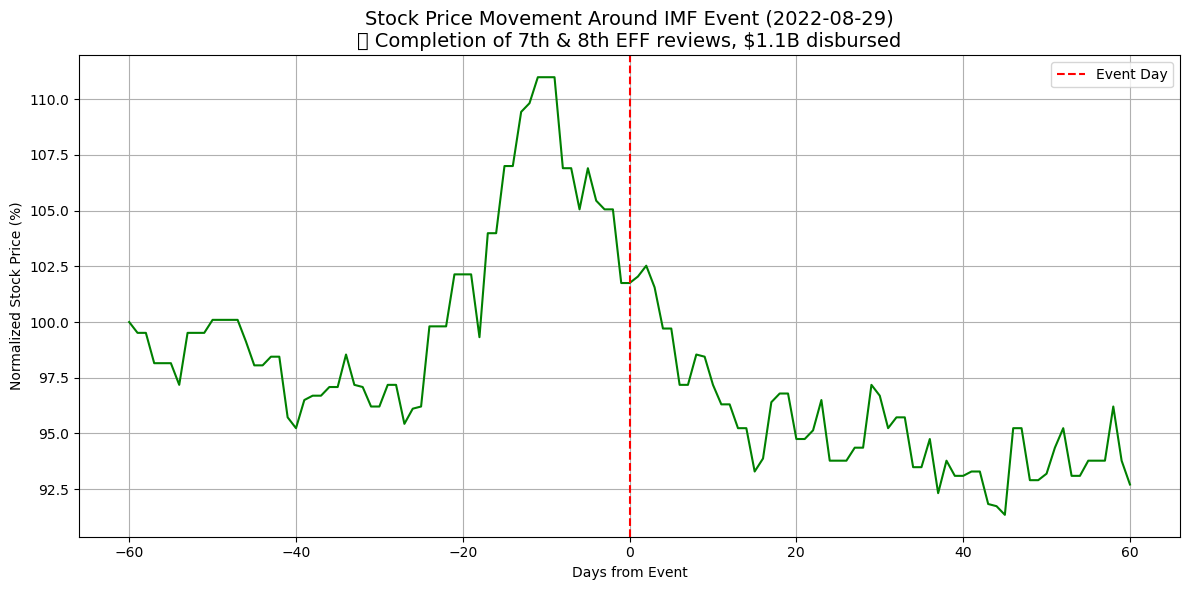

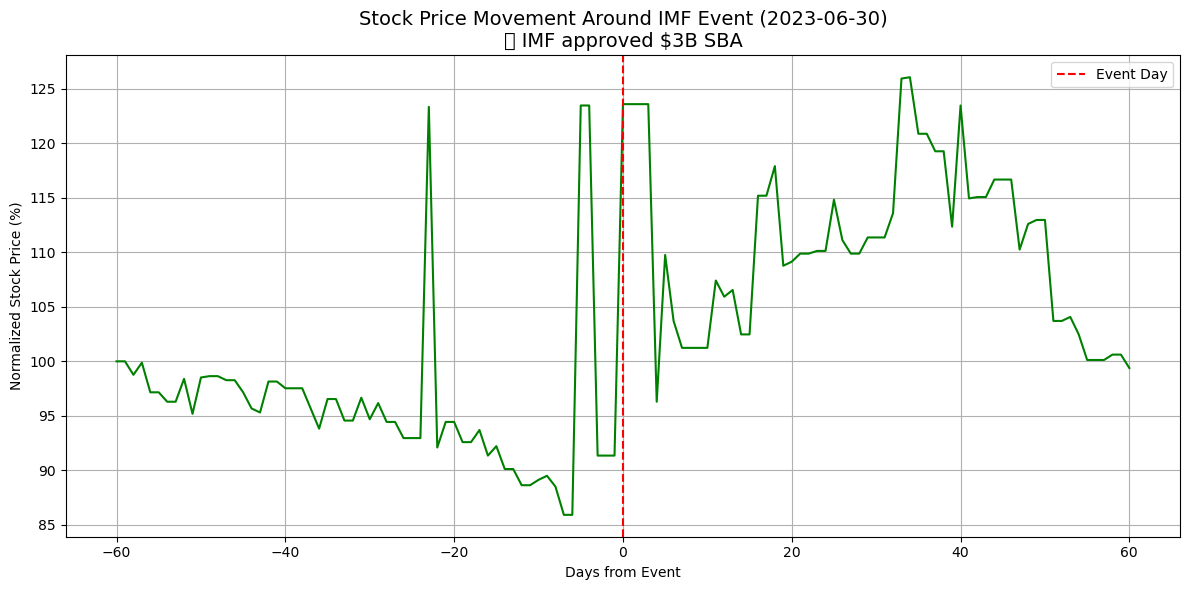

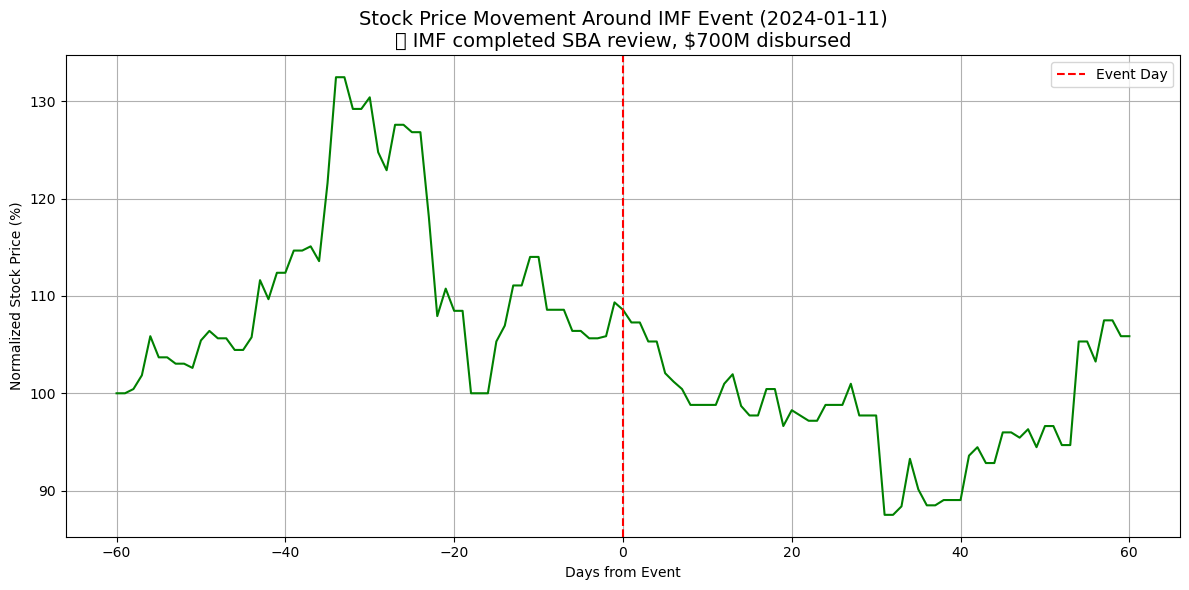

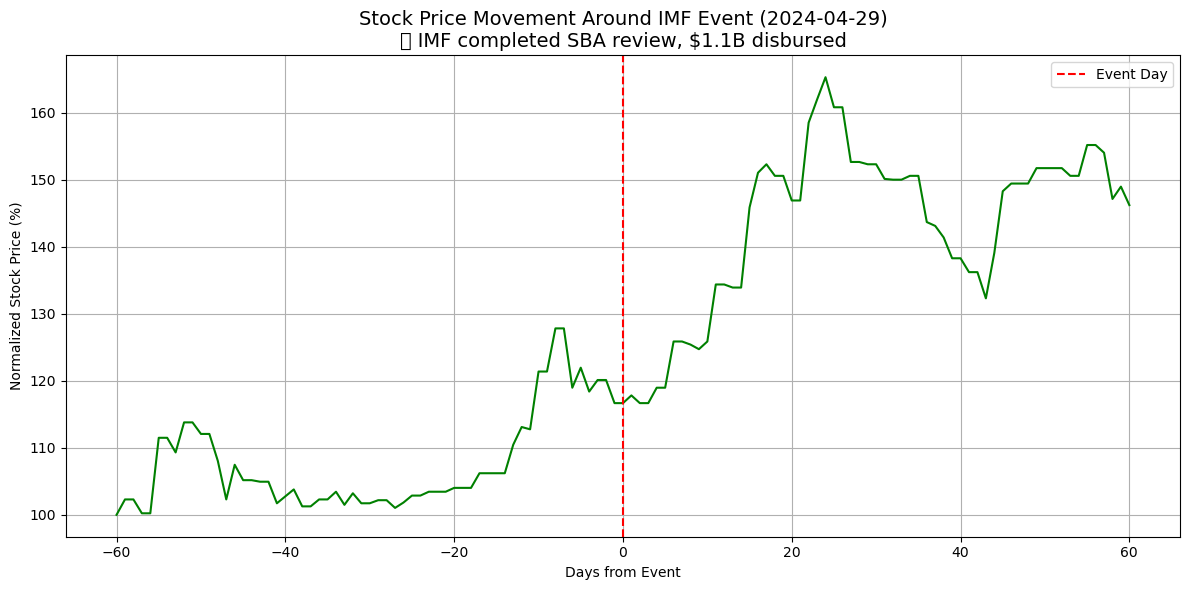

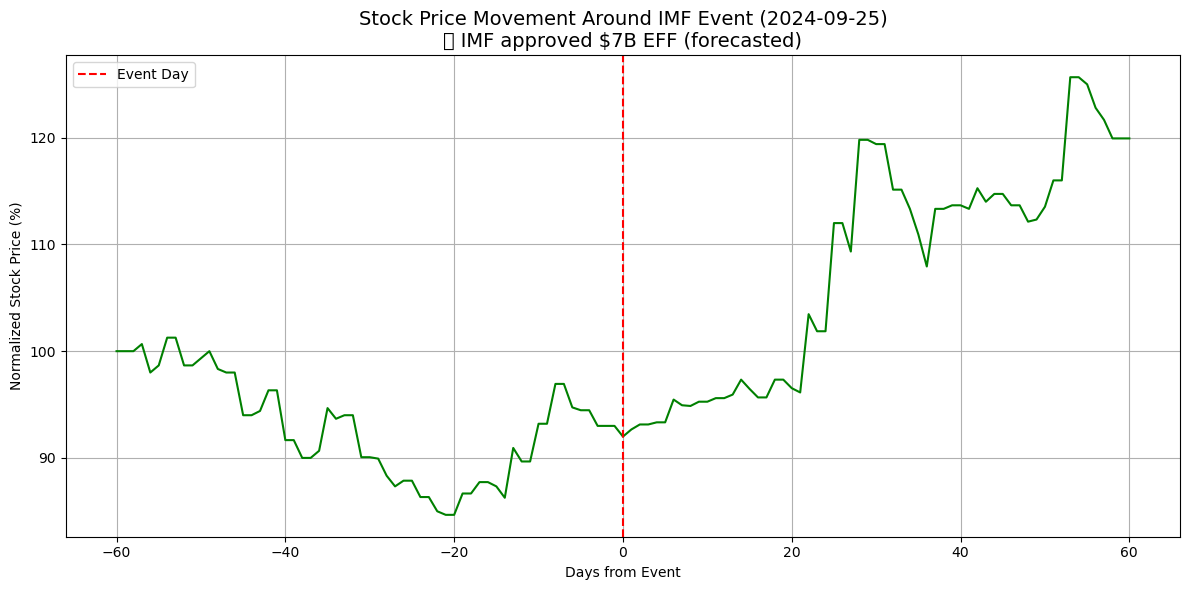

⚠️ Skipped 🔮 IMF completed first review of new EFF (forecasted) — insufficient data points in ±60 day window.


In [53]:
# Define IMF events and comments
imf_events = {
    '2008-11-24': "💸 IMF approved $7.6B SBA",
    '2013-09-04': "💰 IMF approved $6.6B EFF",
    '2019-07-03': "💵 IMF approved $6B EFF",
    '2022-08-29': "📑 Completion of 7th & 8th EFF reviews, $1.1B disbursed",
    '2023-06-30': "✅ IMF approved $3B SBA",
    '2024-01-11': "🧾 IMF completed SBA review, $700M disbursed",
    '2024-04-29': "📤 IMF completed SBA review, $1.1B disbursed",
    '2024-09-25': "📘 IMF approved $7B EFF (forecasted)",
    '2025-05-09': "🔮 IMF completed first review of new EFF (forecasted)"
}

# Set window size
window_days = 60

# Convert keys to datetime
imf_events = {pd.to_datetime(k): v for k, v in imf_events.items()}

# Loop over each event
for date, comment in imf_events.items():
    start = date - pd.Timedelta(days=window_days)
    end = date + pd.Timedelta(days=window_days)

    # Extract window and handle missing dates
    window = df_full[(df_full['Date'] >= start) & (df_full['Date'] <= end)].copy()

    # Continue if we have enough data
    if len(window) >= 40:
        window = window.set_index('Date').reindex(pd.date_range(start, end), method='nearest')
        window['Close'] = window['Close'].interpolate().bfill().ffill()

        if window['Close'].isnull().sum() == 0:
            close_vals = window['Close'].values
            normalized = close_vals / close_vals[0] * 100
            days = np.arange(-window_days, window_days + 1)

            # Plot
            plt.figure(figsize=(12, 6))
            plt.plot(days, normalized, color='green')
            plt.axvline(x=0, color='red', linestyle='--', label='Event Day')
            plt.title(f"Stock Price Movement Around IMF Event ({date.date()})\n{comment}", fontsize=14)
            plt.xlabel('Days from Event')
            plt.ylabel('Normalized Stock Price (%)')
            plt.grid(True)
            plt.tight_layout()
            plt.legend()
            plt.show()
        else:
            print(f"⚠️ Skipped {comment} — too many missing Close values after reindexing.")
    else:
        print(f"⚠️ Skipped {comment} — insufficient data points in ±{window_days} day window.")


# predicted Imf Event on Stock Market 2025

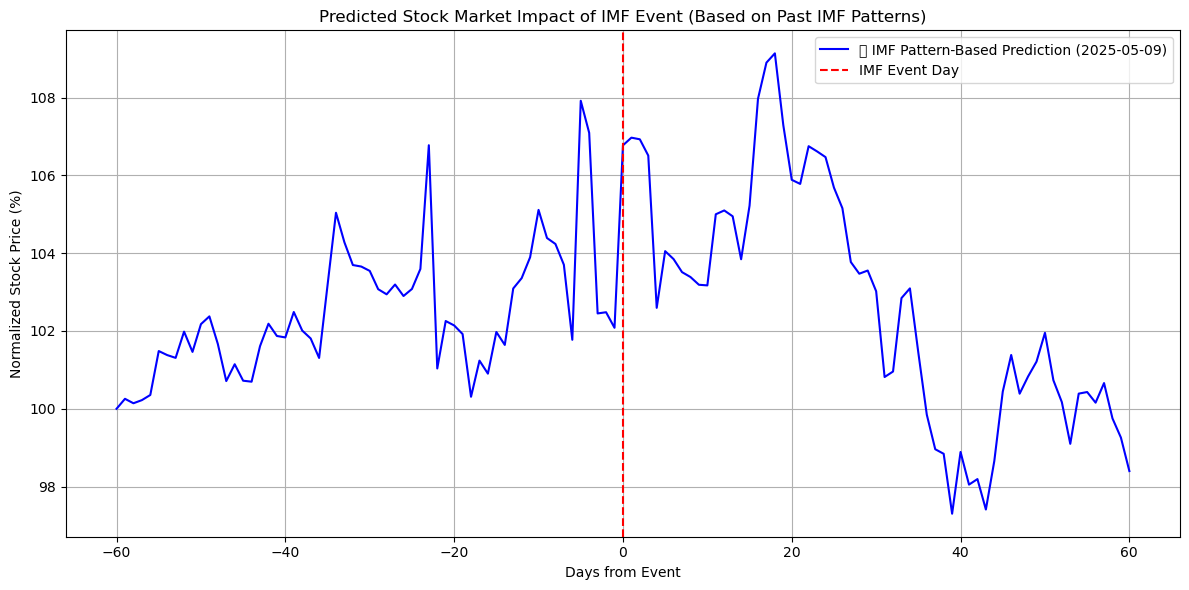

In [55]:
# IMF event dates (historical only)
historical_imf_dates = pd.to_datetime([
    '2008-11-24', '2013-09-04', '2019-07-03',
    '2022-08-29', '2023-06-30', '2024-01-11', '2024-04-29'
])

# Set prediction target: 2025 IMF event
future_imf_date = pd.to_datetime('2025-05-09')
window_days = 60

# Collect normalized patterns from historical IMF windows
patterns = []

for date in historical_imf_dates:
    start = date - pd.Timedelta(days=window_days)
    end = date + pd.Timedelta(days=window_days)
    
    window = df_full[(df_full['Date'] >= start) & (df_full['Date'] <= end)].copy()
    if len(window) >= 40:
        window = window.set_index('Date').reindex(pd.date_range(start, end), method='nearest')
        window['Close'] = window['Close'].interpolate().bfill().ffill()
        close_vals = window['Close'].values
        normalized = close_vals / close_vals[0] * 100
        patterns.append(normalized)

# Average the historical patterns
avg_pattern = np.mean(patterns, axis=0)
days = np.arange(-window_days, window_days + 1)

# Plot the predicted 2025 IMF pattern
plt.figure(figsize=(12, 6))
plt.plot(days, avg_pattern, color='blue', label='📊 IMF Pattern-Based Prediction (2025-05-09)')
plt.axvline(x=0, color='red', linestyle='--', label='IMF Event Day')
plt.title("Predicted Stock Market Impact of IMF Event (Based on Past IMF Patterns)")
plt.xlabel("Days from Event")
plt.ylabel("Normalized Stock Price (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [107]:
model.save("model.h5")

In [109]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [111]:
import os
import json
import pickle
from tensorflow.keras.models import load_model

def save_model_for_deployment(model, scaler, output_dir="deployment_package"):
    os.makedirs(output_dir, exist_ok=True)

    # Save model (.h5)
    model_path = os.path.join(output_dir, "model.h5")
    model.save(model_path)

    # Save scaler (MinMaxScaler)
    scaler_path = os.path.join(output_dir, "scaler.pkl")
    with open(scaler_path, "wb") as f:
        pickle.dump(scaler, f)

    # Save metadata
    metadata = {
        "model_format": "keras_h5",
        "input_shape": list(model.input_shape),
        "output_shape": list(model.output_shape),
        "description": "LSTM stock price predictor",
        "created_at": pd.Timestamp.now().isoformat()
    }
    metadata_path = os.path.join(output_dir, "metadata.json")
    with open(metadata_path, "w") as f:
        json.dump(metadata, f, indent=4)

    print(f"✅ Model, scaler, and metadata saved in: {output_dir}")
